Maximum likelihood estimation is a method that determines values for the parameters of a model. The parameter values are found such that they maximise the likelihood that the process described by the model produced the data that were actually observed.

Let’s suppose we have observed 10 data points from some process. For example, each data point could represent the length of time in seconds that it takes a student to answer a specific exam question. These 10 data points are shown in the figure below

generating the data. This part is very important. At the very least, we should have a good idea about which model to use. This usually comes from having some domain expertise but we wont discuss this here.

For these data we’ll assume that the data generation process can be adequately described by a Gaussian (normal) distribution. Visual inspection of the figure above suggests that a Gaussian distribution is plausible because most of the 10 points are clustered in the middle with few points scattered to the left and the right. (Making this sort of decision on the fly with only 10 data points is ill-advised but given that I generated these data points we’ll go with it).

Recall that the Gaussian distribution has 2 parameters. The mean, μ, and the standard deviation, σ. Different values of these parameters result in different curves (just like with the straight lines above). We want to know which curve was most likely responsible for creating the data points that we observed? (See figure below). Maximum likelihood estimation is a method that will find the values of μ and σ that result in the curve that best fits the data.

Now that we have an intuitive understanding of what maximum likelihood estimation is we can move on to learning how to calculate the parameter values. The values that we find are called the maximum likelihood estimates (MLE).

What we want to calculate is the total probability of observing all of the data, i.e. the joint probability distribution of all observed data points. To do this we would need to calculate some conditional probabilities, which can get very difficult. So it is here that we’ll make our first assumption. The assumption is that each data point is generated independently of the others. This assumption makes the maths much easier. If the events (i.e. the process that generates the data) are independent, then the total probability of observing all of data is the product of observing each data point individually (i.e. the product of the marginal probabilities).



Compute the MLE for a normal distribution.
Compute the MLE for an exponential distribution.
Fit a normal distribution to asset returns using MLE.

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats

Normal Distribution

In [4]:
TRUE_MEAN = 40
TRUE_STD = 10
X = np.random.normal(TRUE_MEAN, TRUE_STD, 1000)

Now we'll define functions that, given our data, will compute the MLE for the $\\mu$ and $\\sigma$ parameters of the normal distribution.

In [2]:
def normal_mu_MLE(X):
    # Get the number of observations
    T = len(X)
    # Sum the observations
    s = sum(X)
    return 1.0/T * s

def normal_sigma_MLE(X):
    T = len(X)
    # Get the mu MLE
    mu = normal_mu_MLE(X)
    # Sum the square of the differences
    s = sum( np.power((X - mu), 2) )
    # Compute sigma^2
    sigma_squared = 1.0/T * s
    return math.sqrt(sigma_squared)

Now let's try our functions out on our sample data and see how they compare to the built-in np.mean and np.std

In [5]:
print("Mean Estimation")
print(normal_mu_MLE(X))
print(np.mean(X))
print("Standard Deviation Estimation")
print(normal_sigma_MLE(X))
print(np.std(X))

Mean Estimation
40.2634059165128
40.26340591651277
Standard Deviation Estimation
10.19062945963157
10.190629459631575


In [6]:
# Now let's estimate both parameters at once with scipy's built in fit() function.

mu, std = scipy.stats.norm.fit(X)
print("mu estimate: " + str(mu))
print("std estimate: " + str(std))

mu estimate: 40.26340591651277
std estimate: 10.190629459631575


AttributeError: 'Rectangle' object has no property 'normed'

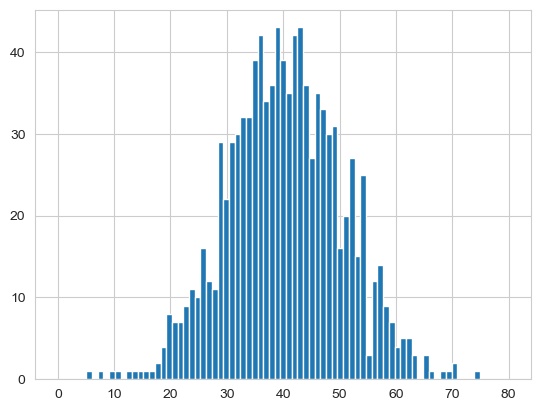

In [7]:
 # Now let's plot the distribution PDF along with the data to see how well it fits. We can do that by accessing the pdf provided in scipy.stats.norm.pdf.

pdf = scipy.stats.norm.pdf
# We would like to plot our data along an x-axis ranging from 0-80 with 80 intervals
# (increments of 1)
x = np.linspace(0, 80, 80)
plt.hist(X, bins=x, normed='true')
plt.plot(pdf(x, loc=mu, scale=std))
plt.xlabel('Value')
plt.ylabel('Observed Frequency')
plt.legend(['Fitted Distribution PDF', 'Observed Data', ]);

# Exponential Distribution

Let's do the same thing, but for the exponential distribution. We'll start by sampling some data.

In [ ]:
TRUE_LAMBDA = 5
X = np.random.exponential(TRUE_LAMBDA, 1000)

numpy` defines the exponential distribution as
$$\\frac{1}{\\lambda}e^{-\\frac{x}{\\lambda}}$$

So we need to invert the MLE from the lecture notes. There it is
$$\\hat\\lambda = \\frac{T}{\\sum_{t=1}^{T} x_t}$$

Here it's just the reciprocal, so

$$\\hat\\lambda = \\frac{\\sum_{t=1}^{T} x_t}{T}$$

In [8]:
def exp_lamda_MLE(X):
    T = len(X)
    s = sum(X)
    return s/T

In [9]:
print("lambda estimate: " + str(exp_lamda_MLE(X)))

lambda estimate: 40.263405916512795


In [11]:
# The scipy version of the exponential distribution has a location parameter
# that can skew the distribution. We ignore this by fixing the location
# parameter to 0 with floc=0
_, l = scipy.stats.expon.fit(X, floc=1)

# is erroring, not going to fix it right now

FitDataError: Invalid values in `data`.  Maximum likelihood estimation with 'expon' requires that 1 < (x - loc)/scale  < inf for each x in `data`.

AttributeError: 'Rectangle' object has no property 'normed'

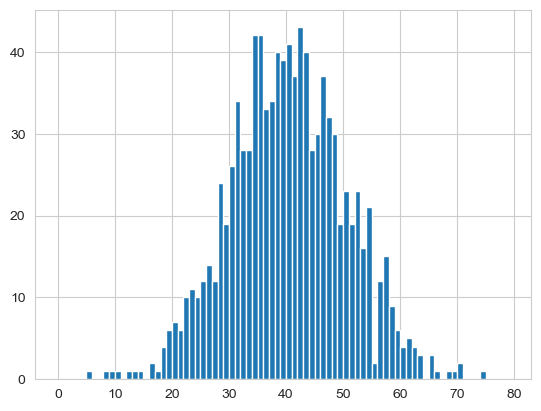

In [12]:
pdf = scipy.stats.expon.pdf
x = range(0, 80)
plt.hist(X, bins=x, normed='true')
plt.plot(pdf(x, scale=l))
plt.xlabel('Value')
plt.ylabel('Observed Frequency')
plt.legend(['Fitted Distribution PDF', 'Observed Data', ]);

MLE for Asset Returns
Now we'll fetch some real returns and try to fit a normal distribution to them using MLE.

In [13]:
import pandas_datareader as pdr
data_tsla = pdr.get_data_yahoo('TSLA')

absolute_returns = np.diff(data_tsla["Open"])
# This will give us the percentage return over the last day's value
# the [:-1] notation gives us all but the last item in the array
# We do this because there are no returns on the final price in the array.
returns = absolute_returns/data_tsla["Open"][:-1]

Let's use `scipy`'s fit function to get the $\\mu$ and $\\sigma$ MLEs.

AttributeError: 'Rectangle' object has no property 'normed'

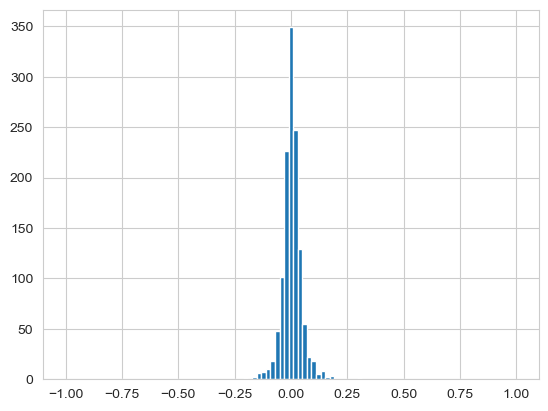

In [14]:
mu, std = scipy.stats.norm.fit(returns)
pdf = scipy.stats.norm.pdf
x = np.linspace(-1,1, num=100)
h = plt.hist(returns, bins=x, normed='true')
l = plt.plot(x, pdf(x, loc=mu, scale=std))

Of course, this fit is meaningless unless we've tested that they obey a normal distribution first. We can test this using the Jarque-Bera normality test. The Jarque-Bera test will reject the hypothesis of a normal distribution if the p-value is under a c.

In [15]:
from statsmodels.stats.stattools import jarque_bera
jarque_bera(returns)

(1238.1726221686934,
 1.3621698837616982e-269,
 0.38994080390712516,
 7.797240865111457)

In [16]:
jarque_bera(np.random.normal(0, 1, 100))

(0.9050520401105896,
 0.6360195226927827,
 -0.06439992247927771,
 2.5520903109273103)